In [1]:
import h5py
import pylab as pl
import numpy as np
import scipy.stats as sp
import matplotlib as mpl
import matplotlib.colors as mpc
import networkx
import progressbar
import astropy.cosmology as apc

In [2]:
def split_unique_id(unique_id):
    """Splits the ids assign to the subhalos by the merger tree code by snap number and subfind number """
    subfind_number = int(unique_id % 1e6)
    snap_number = int((unique_id - subfind_number) / 1e6)
    
    return snap_number, subfind_number

def get_main_branch_unique_ids(subtree, node):
    """Gets the unique ids of the subhalos belonging to the main branch of the selected subhalo (node)"""
    mpb = [node, ]
    i = 0
    while True:
        succesors = list(subtree.successors(node))
        if len(succesors) == 0:
            break
        node = succesors[0] # select only the first succesor (main branch)
        mpb.append(node)
        
    return mpb

In [3]:
pl.rc('font', size = 20)
pl.rc('legend', fontsize = 20)
sim = h5py.File('/data/cielo/simulations/LG1/LG1.hdf5', 'r')
trees = networkx.read_multiline_adjlist('/data/cielo/simulations/LG1/LG1_tree.dat')

In [4]:
ATime, PiD, DensPromotion, TempPromotion, Density, Temp, DensityAvg, EntropyAvg = [], [], [], [], [], [], [], []

for i in range(0,120):
    try:
        aTime, piD, densPromotion, tempPromotion, density, tempp, densityAvg, entropyAvg = np.genfromtxt('/data/cielo/simulations/original/LG1/promotion_{}.txt.gz'.format(i), unpack=True, invalid_raise=False)
        piD = piD.astype('int')
        ATime.extend(list(aTime))
        PiD.extend(list(piD))
        DensPromotion.extend(list(densPromotion))
        TempPromotion.extend(list(tempPromotion))
        Density.extend(list(density))
        Temp.extend(list(tempp))
        DensityAvg.extend(list(densityAvg))
        EntropyAvg.extend(list(entropyAvg))
    except ValueError:
        pass
    
ATime, PiD, DensPromotion, TempPromotion, Density, Temp, DensityAvg, EntropyAvg = np.array(ATime), np.array(PiD), np.array(DensPromotion), np.array(TempPromotion), np.array(Density), np.array(Temp), np.array(DensityAvg), np.array(EntropyAvg)

i = np.where(TempPromotion>Temp)
TempPromotion[i], Temp[i]

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6610 (got 1 columns instead of 8)
    Line #6805 (got 7 columns instead of 8)
    Line #7344 (got 7 columns instead of 8)
    Line #7418 (got 1 columns instead of 8)
    Line #7593 (got 1 columns instead of 8)
    Line #7615 (got 2 columns instead of 8)
    Line #7639 (got 1 columns instead of 8)
    Line #7802 (got 1 columns instead of 8)
    Line #7933 (got 7 columns instead of 8)
    Line #7980 (got 1 columns instead of 8)
    Line #8696 (got 7 columns instead of 8)
    Line #8709 (got 1 columns instead of 8)
    Line #8716 (got 6 columns instead of 8)
    Line #8750 (got 7 columns instead of 8)
    Line #8756 (got 7 columns instead of 8)
    Line #8789 (got 7 columns instead of 8)
    Line #8801 (got 6 columns instead of 8)
    Line #9071 (got 7 columns instead of 8)
    Line #9103 (got 4 columns instead of 8)
    Line #9315 (got 7

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #5729 (got 7 columns instead of 8)
    Line #5770 (got 1 columns instead of 8)
    Line #6026 (got 1 columns instead of 8)
    Line #6052 (got 7 columns instead of 8)
    Line #6193 (got 2 columns instead of 8)
    Line #6341 (got 2 columns instead of 8)
    Line #6415 (got 1 columns instead of 8)
    Line #6428 (got 6 columns instead of 8)
    Line #6562 (got 3 columns instead of 8)
    Line #6851 (got 7 columns instead of 8)
    Line #6899 (got 7 columns instead of 8)
    Line #6911 (got 6 columns instead of 8)
    Line #7282 (got 7 columns instead of 8)
    Line #7420 (got 1 columns instead of 8)
    Line #7480 (got 7 columns instead of 8)
    Line #7963 (got 7 columns instead of 8)
    Line #8294 (got 1 columns instead of 8)
    Line #8332 (got 2 columns instead of 8)
    Line #8482 (got 1 columns instead of 8)
    Line #8650 (got 7

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6226 (got 1 columns instead of 8)
    Line #6400 (got 2 columns instead of 8)
    Line #6532 (got 7 columns instead of 8)
    Line #6799 (got 7 columns instead of 8)
    Line #6845 (got 3 columns instead of 8)
    Line #6972 (got 1 columns instead of 8)
    Line #7181 (got 1 columns instead of 8)
    Line #7569 (got 4 columns instead of 8)
    Line #7669 (got 3 columns instead of 8)
    Line #7696 (got 2 columns instead of 8)
    Line #7753 (got 7 columns instead of 8)
    Line #7993 (got 1 columns instead of 8)
    Line #8019 (got 1 columns instead of 8)
    Line #8026 (got 7 columns instead of 8)
    Line #8388 (got 2 columns instead of 8)
    Line #8406 (got 7 columns instead of 8)
    Line #8435 (got 1 columns instead of 8)
    Line #8869 (got 2 columns instead of 8)
    Line #9087 (got 1 columns instead of 8)
    Line #9526 (got 7

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6025 (got 2 columns instead of 8)
    Line #6298 (got 2 columns instead of 8)
    Line #6454 (got 7 columns instead of 8)
    Line #6477 (got 1 columns instead of 8)
    Line #6671 (got 1 columns instead of 8)
    Line #6739 (got 7 columns instead of 8)
    Line #6836 (got 1 columns instead of 8)
    Line #7262 (got 7 columns instead of 8)
    Line #7558 (got 1 columns instead of 8)
    Line #7614 (got 7 columns instead of 8)
    Line #7836 (got 1 columns instead of 8)
    Line #7941 (got 1 columns instead of 8)
    Line #7954 (got 1 columns instead of 8)
    Line #8065 (got 1 columns instead of 8)
    Line #8085 (got 1 columns instead of 8)
    Line #8089 (got 6 columns instead of 8)
    Line #8275 (got 1 columns instead of 8)
    Line #8379 (got 1 columns instead of 8)
    Line #8410 (got 1 columns instead of 8)
    Line #8707 (got 1

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #5766 (got 1 columns instead of 8)
    Line #5904 (got 2 columns instead of 8)
    Line #5981 (got 1 columns instead of 8)
    Line #5998 (got 1 columns instead of 8)
    Line #6313 (got 6 columns instead of 8)
    Line #6540 (got 7 columns instead of 8)
    Line #6563 (got 7 columns instead of 8)
    Line #6672 (got 2 columns instead of 8)
    Line #7094 (got 7 columns instead of 8)
    Line #7527 (got 1 columns instead of 8)
    Line #7614 (got 1 columns instead of 8)
    Line #7717 (got 1 columns instead of 8)
    Line #7919 (got 1 columns instead of 8)
    Line #7995 (got 7 columns instead of 8)
    Line #8008 (got 1 columns instead of 8)
    Line #8077 (got 1 columns instead of 8)
    Line #8478 (got 1 columns instead of 8)
    Line #8525 (got 7 columns instead of 8)
    Line #8561 (got 1 columns instead of 8)
    Line #8793 (got 1

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6054 (got 4 columns instead of 8)
    Line #6316 (got 1 columns instead of 8)
    Line #6598 (got 6 columns instead of 8)
    Line #6713 (got 1 columns instead of 8)
    Line #6744 (got 1 columns instead of 8)
    Line #6780 (got 1 columns instead of 8)
    Line #6817 (got 1 columns instead of 8)
    Line #6974 (got 1 columns instead of 8)
    Line #7241 (got 7 columns instead of 8)
    Line #7686 (got 1 columns instead of 8)
    Line #7884 (got 1 columns instead of 8)
    Line #7928 (got 1 columns instead of 8)
    Line #7961 (got 2 columns instead of 8)
    Line #8009 (got 6 columns instead of 8)
    Line #8157 (got 6 columns instead of 8)
    Line #8275 (got 1 columns instead of 8)
    Line #8311 (got 4 columns instead of 8)
    Line #8634 (got 1 columns instead of 8)
    Line #8656 (got 7 columns instead of 8)
    Line #8658 (got 1

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6559 (got 7 columns instead of 8)
    Line #6700 (got 2 columns instead of 8)
    Line #6846 (got 2 columns instead of 8)
    Line #6888 (got 1 columns instead of 8)
    Line #6922 (got 1 columns instead of 8)
    Line #7055 (got 1 columns instead of 8)
    Line #7078 (got 4 columns instead of 8)
    Line #7370 (got 7 columns instead of 8)
    Line #7499 (got 1 columns instead of 8)
    Line #7710 (got 7 columns instead of 8)
    Line #8066 (got 1 columns instead of 8)
    Line #8080 (got 1 columns instead of 8)
    Line #8534 (got 2 columns instead of 8)
    Line #8991 (got 9 columns instead of 8)
    Line #9160 (got 1 columns instead of 8)
    Line #9170 (got 6 columns instead of 8)
    Line #9178 (got 7 columns instead of 8)
    Line #9391 (got 1 columns instead of 8)
    Line #9620 (got 1 columns instead of 8)
    Line #9998 (got 1

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #5467 (got 2 columns instead of 8)
    Line #6207 (got 1 columns instead of 8)
    Line #6255 (got 4 columns instead of 8)
    Line #6338 (got 1 columns instead of 8)
    Line #6435 (got 1 columns instead of 8)
    Line #7172 (got 2 columns instead of 8)
    Line #7184 (got 2 columns instead of 8)
    Line #7324 (got 1 columns instead of 8)
    Line #7599 (got 7 columns instead of 8)
    Line #7751 (got 2 columns instead of 8)
    Line #7836 (got 1 columns instead of 8)
    Line #7932 (got 2 columns instead of 8)
    Line #8902 (got 2 columns instead of 8)
    Line #9048 (got 3 columns instead of 8)
    Line #9201 (got 1 columns instead of 8)
    Line #9309 (got 1 columns instead of 8)
    Line #9780 (got 2 columns instead of 8)
    Line #10031 (got 1 columns instead of 8)
    Line #10065 (got 7 columns instead of 8)
    Line #10155 (go

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #5840 (got 1 columns instead of 8)
    Line #6220 (got 6 columns instead of 8)
    Line #6411 (got 1 columns instead of 8)
    Line #6628 (got 1 columns instead of 8)
    Line #6631 (got 1 columns instead of 8)
    Line #6651 (got 7 columns instead of 8)
    Line #6729 (got 1 columns instead of 8)
    Line #6921 (got 1 columns instead of 8)
    Line #6964 (got 1 columns instead of 8)
    Line #7284 (got 1 columns instead of 8)
    Line #7423 (got 1 columns instead of 8)
    Line #7449 (got 6 columns instead of 8)
    Line #7536 (got 1 columns instead of 8)
    Line #8089 (got 1 columns instead of 8)
    Line #8109 (got 7 columns instead of 8)
    Line #8137 (got 1 columns instead of 8)
    Line #8194 (got 2 columns instead of 8)
    Line #8229 (got 1 columns instead of 8)
    Line #8232 (got 1 columns instead of 8)
    Line #8318 (got 3

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6079 (got 5 columns instead of 8)
    Line #6120 (got 6 columns instead of 8)
    Line #6131 (got 1 columns instead of 8)
    Line #6224 (got 6 columns instead of 8)
    Line #6383 (got 1 columns instead of 8)
    Line #6563 (got 1 columns instead of 8)
    Line #6621 (got 1 columns instead of 8)
    Line #6670 (got 7 columns instead of 8)
    Line #6729 (got 1 columns instead of 8)
    Line #6765 (got 7 columns instead of 8)
    Line #6803 (got 1 columns instead of 8)
    Line #6821 (got 1 columns instead of 8)
    Line #6857 (got 1 columns instead of 8)
    Line #7181 (got 9 columns instead of 8)
    Line #7185 (got 6 columns instead of 8)
    Line #7660 (got 2 columns instead of 8)
    Line #7983 (got 1 columns instead of 8)
    Line #8121 (got 7 columns instead of 8)
    Line #8128 (got 1 columns instead of 8)
    Line #8223 (got 6

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #5832 (got 4 columns instead of 8)
    Line #5914 (got 7 columns instead of 8)
    Line #5992 (got 1 columns instead of 8)
    Line #6298 (got 1 columns instead of 8)
    Line #6401 (got 7 columns instead of 8)
    Line #6413 (got 1 columns instead of 8)
    Line #6528 (got 3 columns instead of 8)
    Line #6661 (got 1 columns instead of 8)
    Line #6703 (got 15 columns instead of 8)
    Line #6785 (got 1 columns instead of 8)
    Line #6844 (got 1 columns instead of 8)
    Line #6862 (got 7 columns instead of 8)
    Line #7000 (got 2 columns instead of 8)
    Line #7162 (got 1 columns instead of 8)
    Line #8098 (got 1 columns instead of 8)
    Line #8226 (got 3 columns instead of 8)
    Line #8257 (got 1 columns instead of 8)
    Line #8268 (got 1 columns instead of 8)
    Line #8396 (got 1 columns instead of 8)
    Line #8450 (got 

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #6236 (got 6 columns instead of 8)
    Line #6557 (got 2 columns instead of 8)
    Line #6575 (got 1 columns instead of 8)
    Line #6609 (got 7 columns instead of 8)
    Line #6787 (got 1 columns instead of 8)
    Line #7039 (got 1 columns instead of 8)
    Line #7177 (got 1 columns instead of 8)
    Line #7649 (got 2 columns instead of 8)
    Line #7809 (got 1 columns instead of 8)
    Line #7953 (got 1 columns instead of 8)
    Line #8143 (got 2 columns instead of 8)
    Line #8176 (got 1 columns instead of 8)
    Line #8315 (got 7 columns instead of 8)
    Line #8328 (got 1 columns instead of 8)
    Line #8711 (got 1 columns instead of 8)
    Line #8869 (got 1 columns instead of 8)
    Line #8875 (got 2 columns instead of 8)
    Line #8894 (got 1 columns instead of 8)
    Line #8944 (got 2 columns instead of 8)
    Line #9090 (got 3

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


(array([9592.93]), array([7129.]))

In [5]:
# a bunch of constants
UnitMass_in_g = 1.989e+43
UnitTime_in_s = 3.08568e+16
UnitVelocity_in_cm_per_s = 100000
UnitDensity_in_cgs = 6.7699e-22
UnitEnergy_in_cgs = 1.989e+53
GAMMA_MINUS1 = 2./3.
PROTONMASS = 1.6726e-24
BOLTZMANN = 1.3806e-16    

HMass = 1.00794
FeMass = 55.845
OMass = 15.9994
NfeNhe_sun = -4.5 # grevesse & saundall 98
NoNfe_sun = 1.33 # same

def tempFromMass(Mass, Abund, IE, ne1):
    XH = Abund[:,6]/Mass
    yHelium = (1. - XH)/(4.*XH)
    mu = (1 + 4.* yHelium)/ (1.+ yHelium + ne1 )
    temp = GAMMA_MINUS1 * IE * mu * 1.6726 / 1.3806 * 1.e-8 # / BOLTZMANN  * PROTONMASS
    temp = temp * 1e10 #   UnitEnergy_in_cgs / UnitMass_in_g;
    return temp


def getPromotion(snap, pidds):
    if 30<snap<128:
        atime1_ = sim['SnapNumber_{}/Header/Time'.format(snap-1)][()]
        atime2_ = sim['SnapNumber_{}/Header/Time'.format(snap+1)][()]
        atime3_ = sim['SnapNumber_{}/Header/Time'.format(snap)][()]
        atime1 = atime1_+(atime3_-atime1_)*.5
        atime2 = atime2_-(atime2_-atime3_)*.5
    elif snap==30:
        atime1 = sim['SnapNumber_{}/Header/Time'.format(snap)][()]
        atime2_ = sim['SnapNumber_{}/Header/Time'.format(snap+1)][()]
        atime2 = atime2_-(atime2_-atime1)*.5
    else:
        atime1_ = sim['SnapNumber_{}/Header/Time'.format(snap-1)][()]
        atime2 = sim['SnapNumber_{}/Header/Time'.format(snap)][()]
        atime1 = atime2 - (atime2-atime1_)*.5
    ii = np.where((ATime>atime1) & (ATime<atime2))
    PiD_ = PiD[ii]
    iip = np.isin(pidds, PiD_)
    iare = np.where(iip)[0] # index that "are"
    inot = np.where(iip==False)[0] # index that "are" not
    # i still need to link temperatures with the ones that "are", this is gonna be tricky
    # lets make a list of those who are, first
    pidss_are = pidds[iare]
    ij = np.isin(PiD, pidss_are)
    ij_ = np.where((ij) & (ATime>atime1) & (ATime<atime2))[0]
    PiD__= PiD[ij_]
    DensPromotion__ = DensPromotion[ij_]
    TempPromotion__ = TempPromotion[ij_]
    Density__ = Density[ij_]
    Temp__ = Temp[ij_]
    DensityAvg__ = DensityAvg[ij_]
    EntropyAvg__ = EntropyAvg[ij_]
    
    PiD___, iun = np.unique(PiD__, return_index=True)
    iun2 = []
    
    for p in PiD___:
        ik = np.where(PiD__==p)[0]
        t = Temp__[ik] - TempPromotion__[ik]
        io = np.argsort(t)
        iun2.append(ik[io[-1]])
        
    iun2 = np.array(iun2)
    
    if iun2.size>0:
        PiD__ = PiD__[iun2]
        DensPromotion__ = DensPromotion__[iun2]
        TempPromotion__ = TempPromotion__[iun2]
        Density__ = Density__[iun2]
        Temp__ = Temp__[iun2]
        DensityAvg__ = DensityAvg__[iun2]
        EntropyAvg__ = EntropyAvg__[iun2]
    else:
        PiD__ = np.array([])
        DensPromotion__ = np.array([])
        TempPromotion__ = np.array([])
        Density__ = np.array([])
        Temp__ = np.array([])
        DensityAvg__ = np.array([])
        EntropyAvg__ = np.array([])
    
    # I think i got it.
    
    is1 = np.argsort(pidss_are) # the target
    is2 = np.argsort(PiD__)
    
    DensPromotion_order = np.zeros(PiD__.size)
    TempPromotion_order = np.zeros(PiD__.size)
    Density_order = np.zeros(PiD__.size)
    Temp_order = np.zeros(PiD__.size)
    DensityAvg_order = np.zeros(PiD__.size)
    EntropyAvg_order = np.zeros(PiD__.size)
    
    DensPromotion_order[is1] = DensPromotion__[is2]
    TempPromotion_order[is1] = TempPromotion__[is2]
    Density_order[is1] = Density__[is2]
    Temp_order[is1] = Temp__[is2]
    DensityAvg_order[is1] = DensityAvg__[is2]
    EntropyAvg_order[is1] = EntropyAvg__[is2]
    
    DensPromotion_order2 = np.ones(pidds.size)*-1.
    TempPromotion_order2 = np.ones(pidds.size)*-1.
    Density_order2 = np.ones(pidds.size)*-1.
    Temp_order2 = np.ones(pidds.size)*-1.
    DensityAvg_order2 = np.ones(pidds.size)*-1.
    EntropyAvg_order2 = np.ones(pidds.size)*-1.
    
    DensPromotion_order2[iare] = DensPromotion_order
    TempPromotion_order2[iare] = TempPromotion_order
    Density_order2[iare] = Density_order
    Temp_order2[iare] = Temp_order
    DensityAvg_order2[iare] = DensityAvg_order
    EntropyAvg_order2[iare] = EntropyAvg_order
    
    return DensPromotion_order2, TempPromotion_order2, Density_order2, Temp_order2, DensityAvg_order2, EntropyAvg_order2

In [6]:
#ok, now the serialized version of the get particles for each Satellite, lets see.
TdayTotalIDs = sim['SnapNumber_128/PartType0/ParticleIDs'][()] # need this first
I= np.identity(3) # and this

In [7]:
Cosmo = apc.FlatLambdaCDM(H0=100, Om0=0.3175)

In [8]:
def getAllLastP(fofID, centralID):
    """
    get position, masses and abundances of all particles that in past snapshot belong to a given subhalo,
    and a z=0 are located at athe maximum distance of 600 kpc to the subhalo,
    rotated by the velocity and the vector to the centre.
    """
    uniqueID = int(128*1e6+fofID)
    stree = networkx.dfs_tree(trees, str(uniqueID))
    mtree = get_main_branch_unique_ids(stree, str(uniqueID))
    
    uniqueIDC = int(128*1e6+centralID)
    streeC = networkx.dfs_tree(trees, str(uniqueIDC))
    mtreeC = get_main_branch_unique_ids(streeC, str(uniqueIDC))
    
    #firts find all the particleIDs that once belong to the subgroup
    Idlist = []
    zlist = []
    DensProm, TempProm, Dens, Tempp, DensAvg, EntAvg = [], [], [], [], [], []
    distlist = []
    z2, z1 = -1., -1.
    
    for mm, mmC in zip(mtree[1:], mtreeC[1:]): # ignore the first one
        snap, idd = split_unique_id(int(mm))
        tempOff = sim['SnapNumber_{}/SubGroups/PartType0/Offsets'.format(snap)][idd].astype('int')
        snapC, iddC = split_unique_id(int(mmC))
        if tempOff[0]>= 0 and tempOff[1]>=0:
            tempIds = sim['SnapNumber_{}/PartType0/ParticleIDs'.format(snap)][tempOff[0]:tempOff[1]]
#             # and the temperature
#             IE = sim['SnapNumber_{}/PartType0/InternalEnergy'.format(snap)][tempOff[0]:tempOff[1]]
#             Mass = sim['SnapNumber_{}/PartType0/Masses'.format(snap)][tempOff[0]:tempOff[1]]
#             Abund = sim['SnapNumber_{}/PartType0/Abundances'.format(snap)][tempOff[0]:tempOff[1]]
#             ne1 = sim['SnapNumber_{}/PartType0/ElectronAbundance'.format(snap)][tempOff[0]:tempOff[1]]
#             val2 = tempFromMass(Mass, Abund, IE, ne1)
#             templist2.extend(list(val2))
            # and the metallicity
#             AbundatTime = sim['SnapNumber_{}/PartType0/Abundances'.format(snap)][tempOff[0]:tempOff[1]]
#             val = np.log10((AbundatTime[:,4]/FeMass)/(AbundatTime[:,6]/HMass)) - NfeNhe_sun
#             val = (AbundatTime[:,4]/FeMass)/(AbundatTime[:,6]/HMass)
#             templist.extend(list(val))
            zz = sim['SnapNumber_{}/Header/Redshift'.format(snap)][()]
            zlist.extend([zz]*tempIds.size)
            
            # and the distance to the centre (of the galaxy in virial radius units)
            galP = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][idd]
            cenP = sim['SnapNumber_{}/SubGroups/SubGroupPos'.format(snap)][iddC]
            gro = sim['SnapNumber_{}/SubGroups/GroupNumber'.format(snap)][iddC]
            R200 = sim['SnapNumber_{}/Groups/Group_R_Crit200'.format(snap)][gro]
            
            defe = cenP - galP
            dist = np.sqrt(np.sum(defe**2.))/R200
            
            if dist<2.:
                z2 = zz
            if dist<1.:
                z1 = zz
            
            densProm, tempProm, dens, tempp, densAvg, entAvg = getPromotion(snap, tempIds)
            
            DensProm.extend(list(densProm))
            TempProm.extend(list(tempProm))
            Dens.extend(list(dens))
            Tempp.extend(list(tempp))
            DensAvg.extend(list(densAvg))
            EntAvg.extend(list(entAvg))
            
            distlist.extend([dist]*tempIds.size)
            
            Idlist.extend(list(tempIds))

    Idlist = np.array(Idlist)
    zlist = np.array(zlist)
    distlist = np.array(distlist)
    
    DensProm = np.array(DensProm)
    TempProm = np.array(TempProm)
    Dens = np.array(Dens)
    Tempp = np.array(Tempp)
    DensAvg = np.array(DensAvg)
    EntAvg = np.array(EntAvg)
    
    Idlist, Idunique = np.unique(Idlist, return_index=True) # remove duplicates
    zlist = zlist[Idunique]
    distlist = distlist[Idunique]
    
    DensProm = DensProm[Idunique]
    TempProm = TempProm[Idunique]
    Dens = Dens[Idunique]
    Tempp = Tempp[Idunique]
    DensAvg = DensAvg[Idunique]
    EntAvg = EntAvg[Idunique]
    
    TdayOff = sim['SnapNumber_128/SubGroups/PartType0/Offsets'][fofID].astype('int')
    
    IndexToday = np.in1d(TdayTotalIDs, Idlist)
    IndexToday_ = np.where(IndexToday)[0]
    
    # lets remove the ones that are not part of the group today.
    TdayIDs = sim['SnapNumber_128/PartType0/ParticleIDs'][TdayOff[0]:TdayOff[1]]

    IndexNot = np.in1d(Idlist, TdayIDs)
    IdNot = Idlist[np.where(IndexNot==False)[0]]

    IndexT = np.in1d(TdayTotalIDs, IdNot)
    IndexT_ = np.where(IndexT)[0]
    
    # and temperature
    SurvIds_ = TdayTotalIDs[IndexT_]
    iidex = np.in1d(Idlist, SurvIds_)
    iidex_ = np.where(iidex)[0]
    zlist_, Idlist_ = zlist[iidex_], Idlist[iidex_]
    distlist_ = distlist[iidex_]

    DensProm_ = DensProm[iidex_]
    TempProm_ = TempProm[iidex_]
    Dens_ = Dens[iidex_]
    Tempp_ = Tempp[iidex_]
    DensAvg_ = DensAvg[iidex_]
    EntAvg_ = EntAvg[iidex_]
    
    is1 = np.argsort(SurvIds_) # the target
    is2 = np.argsort(Idlist_)

    zorder = np.zeros(IndexT_.size)
    
    zorder[is1] = zlist_[is2]

    distorder = np.zeros(IndexT_.size)
    distorder[is1] = distlist_[is2]
    
    DensProm_order = np.zeros(IndexT_.size)
    TempProm_order = np.zeros(IndexT_.size)
    Dens_order = np.zeros(IndexT_.size)
    Tempp_order = np.zeros(IndexT_.size)
    DensAvg_order = np.zeros(IndexT_.size)
    EntAvg_order = np.zeros(IndexT_.size)
    
    DensProm_order[is1] = DensProm_[is2]
    TempProm_order[is1] = TempProm_[is2]
    Dens_order[is1] = Dens_[is2]
    Tempp_order[is1] = Tempp_[is2]
    DensAvg_order[is1] = DensAvg_[is2]
    EntAvg_order[is1] = EntAvg_[is2]
    
    GasMasses = sim['SnapNumber_128/PartType0/Masses'][IndexT_]
    GassAbundances = sim['SnapNumber_128/PartType0/Abundances'][IndexT_]
    
    return GasMasses, GassAbundances, zorder, distorder, DensProm_order, TempProm_order, Dens_order, Tempp_order, DensAvg_order, EntAvg_order, z1, z2

In [9]:
# ok, lets test this
GasMasses, GassAbundances, zorder, distlist, DensProm_order, TempProm_order, Dens_order, Tempp_order, DensAvg_order, EntAvg_order, z1, z2 = getAllLastP(4338, 4337)

In [10]:
zu = np.unique(zorder)
tzu = Cosmo.lookback_time(zu).value

Mass = []
dist = []
DeltaTemp = []
Percent = []

for z in zu:
    ii = np.where(zorder==z)[0]
    GMass = np.sum(GasMasses[ii])
    distt = np.mean(distlist[ii])
    tempT, tempProm = Tempp_order[ii], TempProm_order[ii]
    i = np.where(tempProm>0.)
    dT = np.mean(-tempProm[i] + tempT[i])
#     dT = np.mean(tempProm[i])
    pct = i[0].size/tempT.size
    DeltaTemp.append(dT)
    Mass.append(GMass)
    dist.append(distt)
    Percent.append(pct)
    
Mass = np.array(Mass)*1e10
DeltaTemp = np.array(DeltaTemp)
dist = np.array(dist)
Percent = np.array(Percent)

/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/srodriguez/miniconda3/envs/cielo_old/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'log(Gas Mass ejected/M_sun)')

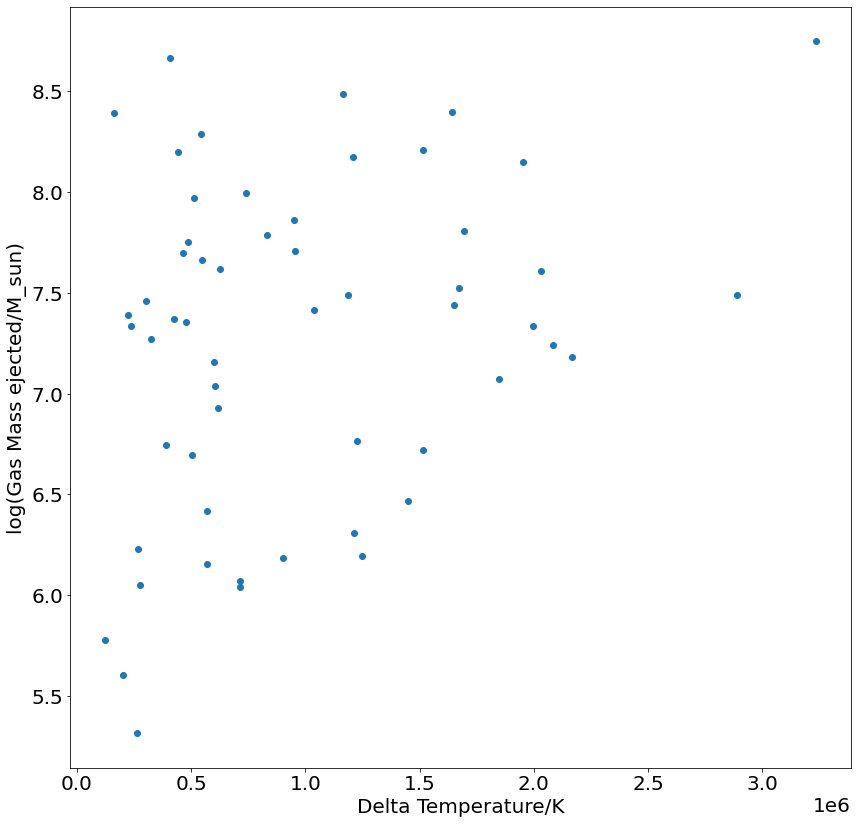

In [11]:
# so, firts, just mass vs SFR or so.

pl.figure(figsize=(14,14))

pl.scatter(DeltaTemp, np.log10(Mass), marker='o')

#pl.yscale('log')
# pl.xscale('log')

pl.xlabel('Delta Temperature/K')
pl.ylabel('log(Gas Mass ejected/M_sun)')

0.24339225775468964 0.38219559019532867


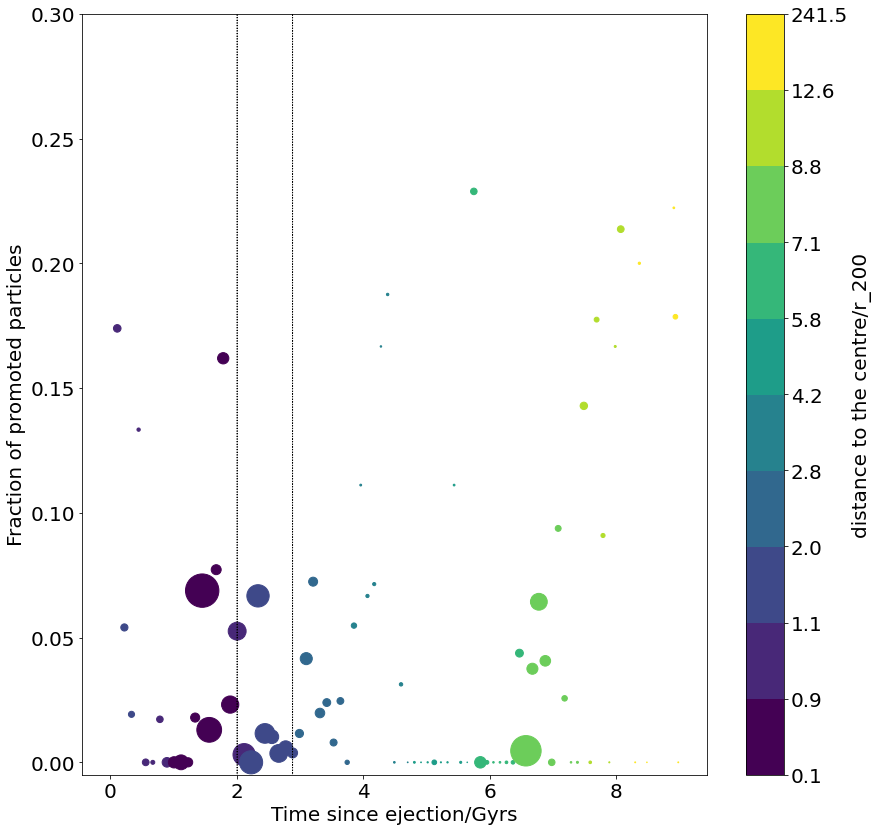

In [12]:
pl.figure(figsize=(14,14))

vaper = np.linspace(0, 100, 11)
papels = np.percentile(dist, vaper)
norm = mpc.BoundaryNorm(boundaries=papels, ncolors=256)

pl.scatter(tzu, Percent, s=Mass/5e5, c=dist, norm=norm)

tz1 = Cosmo.lookback_time(z1).value
tz2 = Cosmo.lookback_time(z2).value

pl.arrow(tz1, -100., 0., 200, color='black', ls=':')
pl.arrow(tz2, -100., 0., 200, color='black', ls=':')

bar = pl.colorbar(label='distance to the centre/r_200')
bar.set_ticks(papels)

pl.ylabel('Fraction of promoted particles')
pl.xlabel('Time since ejection/Gyrs')

pl.ylim(-0.005, 0.3)

print(z1, z2)

In [13]:
# ok, lets test this
GasMasses1, GassAbundances1, zorder1, distlist1, DensProm_order1, TempProm_order1, Dens_order1, Tempp_order1, DensAvg_order1, EntAvg_order1, z1_1, z2_1 = getAllLastP(4341, 4337)

In [14]:
zu1 = np.unique(zorder1)
tzu1 = Cosmo.lookback_time(zu1).value

Mass1 = []
dist1 = []
DeltaTemp1 = []
Percent1 = []

for z in zu1:
    ii = np.where(zorder1==z)[0]
    GMass = np.sum(GasMasses1[ii])
    distt = distlist1[ii[0]]
    tempT, tempProm = Tempp_order1[ii], TempProm_order1[ii]
    i = np.where(tempProm>0.)
    dT = np.mean(-tempProm[i] + tempT[i])
#     dT = np.mean(tempProm[i])
    pct = i[0].size/tempT.size
    Mass1.append(GMass)
    dist1.append(distt)
    DeltaTemp1.append(dT)
    Percent1.append(pct)
    
Mass1 = np.array(Mass1)*1e10
dist1 = np.array(dist1)
DeltaTemp1 = np.array(DeltaTemp1)
Percent1 = np.array(Percent1)

Text(0, 0.5, 'log(Gas Mass ejected/M_sun)')

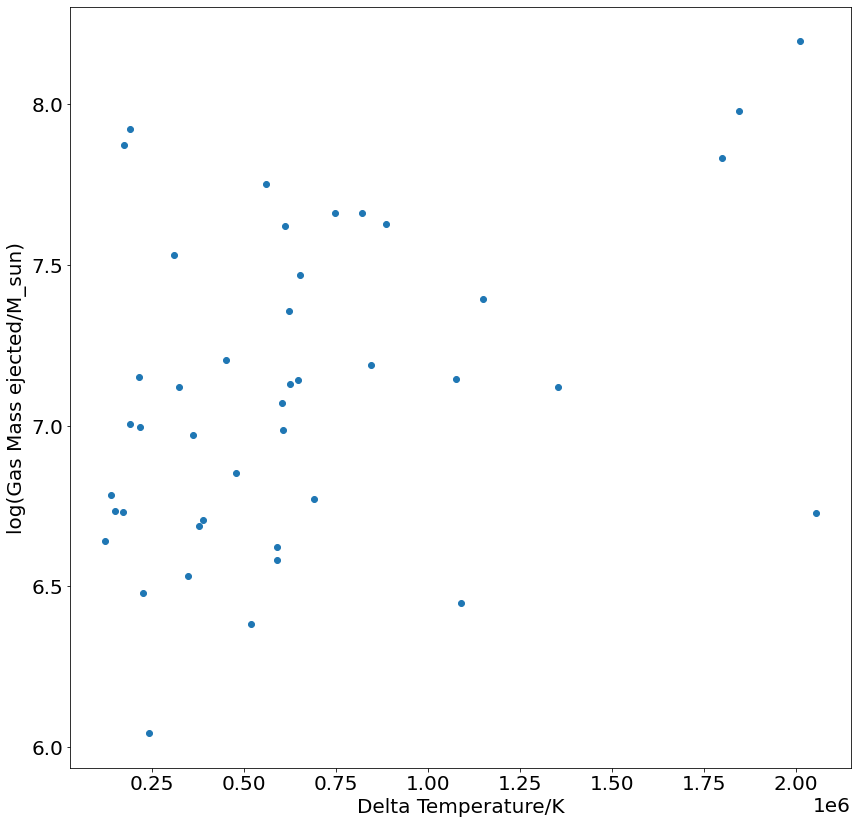

In [15]:
pl.figure(figsize=(14,14))

pl.scatter(DeltaTemp1, np.log10(Mass1), marker='o')

#pl.yscale('log')
# pl.xscale('log')

pl.xlabel('Delta Temperature/K')
pl.ylabel('log(Gas Mass ejected/M_sun)')

0.2594730228456261 0.3634722484955717


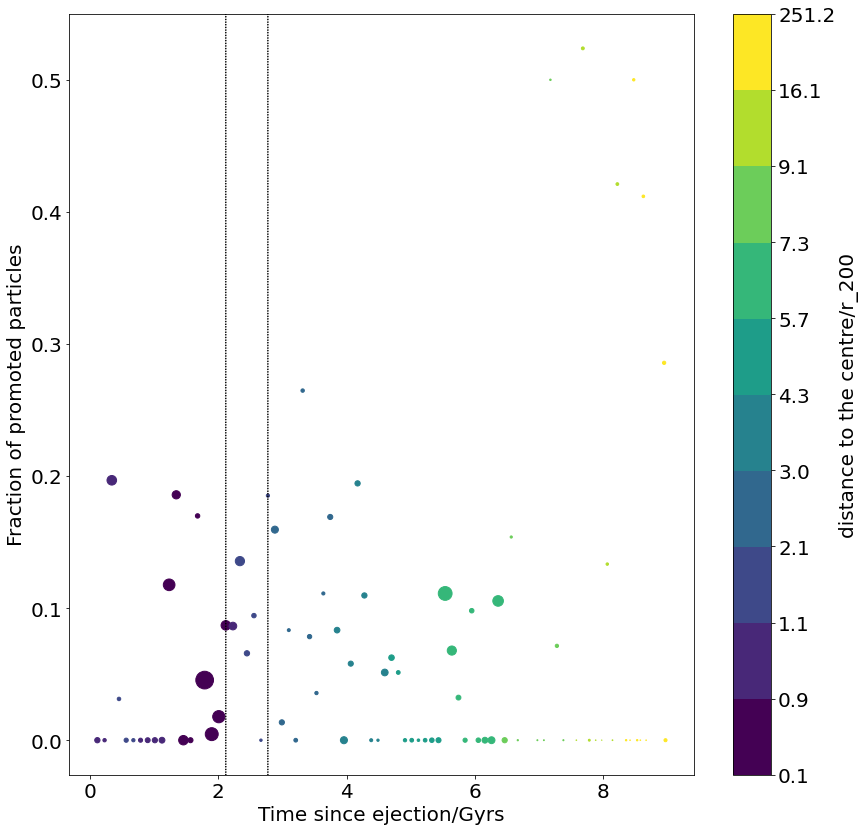

In [16]:
pl.figure(figsize=(14,14))

papels1 = np.percentile(dist1, vaper)
norm1 = mpc.BoundaryNorm(boundaries=papels1, ncolors=256)

pl.scatter(tzu1, Percent1, s=Mass1/5e5, c=dist1, norm=norm1)

tz1_1 = Cosmo.lookback_time(z1_1).value
tz2_1 = Cosmo.lookback_time(z2_1).value

pl.arrow(tz1_1, -100., 0., 200, color='black', ls=':')
pl.arrow(tz2_1, -100., 0., 200, color='black', ls=':')

bar = pl.colorbar(label='distance to the centre/r_200')
bar.set_ticks(papels1)

pl.ylabel('Fraction of promoted particles')
pl.xlabel('Time since ejection/Gyrs')

print(z1_1, z2_1)

In [17]:
GasMasses2, GassAbundances2, zorder2, distlist2, DensProm_order2, TempProm_order2, Dens_order2, Tempp_order2, DensAvg_order2, EntAvg_order2, z1_2, z2_2 = getAllLastP(4470, 4469)

In [18]:
zu2 = np.unique(zorder2)
tzu2 = Cosmo.lookback_time(zu2).value

Mass2 = []
dist2 = []
DeltaTemp2 = []
Percent2 = []

for z in zu2:
    ii = np.where(zorder2==z)[0]
    GMass = np.sum(GasMasses2[ii])
    distt = distlist2[ii[0]]
    tempT, tempProm = Tempp_order2[ii], TempProm_order2[ii]
    i = np.where(tempProm>0.)
    dT = np.mean(- tempProm[i] + tempT[i])
#     dT = np.mean(tempProm[i])
    pct = i[0].size/tempT.size
    Mass2.append(GMass)
    dist2.append(distt)
    DeltaTemp2.append(dT)
    Percent2.append(pct)    
    
Mass2 = np.array(Mass2)*1e10
dist2 = np.array(dist2)
DeltaTemp2 = np.array(DeltaTemp2)
Percent2 = np.array(Percent2)

Text(0, 0.5, 'log(Gas Mass ejected/M_sun)')

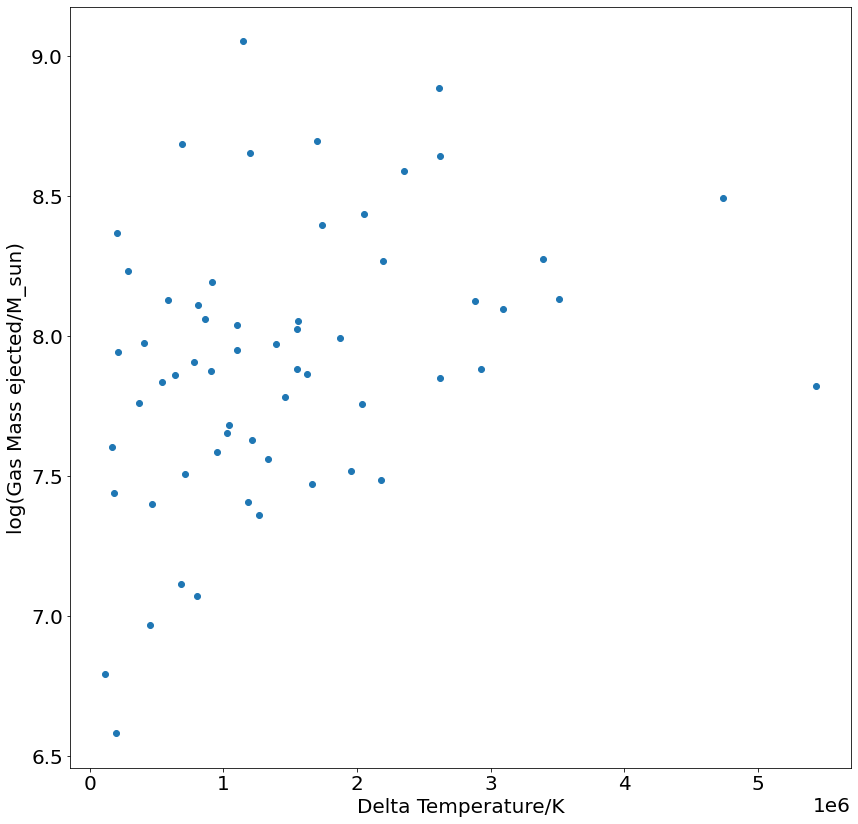

In [19]:
pl.figure(figsize=(14,14))

pl.scatter(DeltaTemp2, np.log10(Mass2), marker='o')

#pl.yscale('log')
# pl.xscale('log')

pl.xlabel('Delta Temperature/K')
pl.ylabel('log(Gas Mass ejected/M_sun)')

0.08557441528498821 0.46170561124483767


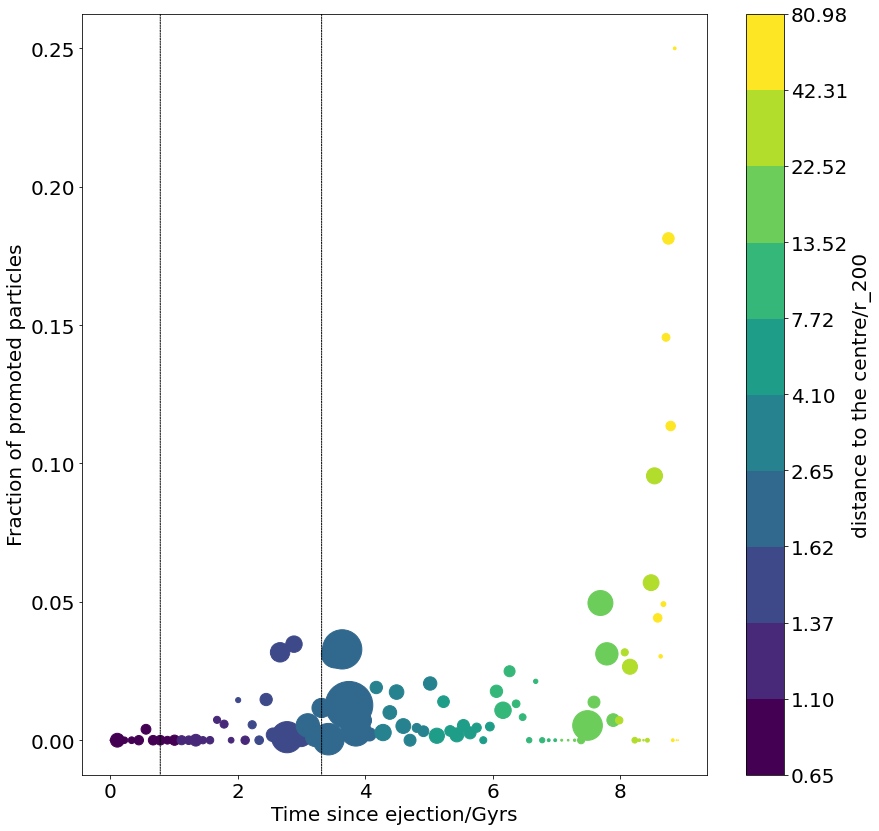

In [20]:
pl.figure(figsize=(14,14))


papels2 = np.percentile(dist2, vaper)
norm2 = mpc.BoundaryNorm(boundaries=papels2, ncolors=256)

pl.scatter(tzu2, Percent2, s=Mass2/5e5, c=dist2, norm=norm2)

tz1_2 = Cosmo.lookback_time(z1_2).value
tz2_2 = Cosmo.lookback_time(z2_2).value

pl.arrow(tz1_2, -100., 0., 200, color='black', ls=':')
pl.arrow(tz2_2, -100., 0., 200, color='black', ls=':')

bar = pl.colorbar(label='distance to the centre/r_200')
bar.set_ticks(papels2)

pl.ylabel('Fraction of promoted particles')
pl.xlabel('Time since ejection/Gyrs')

print(z1_2, z2_2)

In [21]:
GasMasses3, GassAbundances3, zorder3, distlist3, DensProm_order3, TempProm_order3, Dens_order3, Tempp_order3, DensAvg_order3, EntAvg_order3, z1_3, z2_3 = getAllLastP(4474, 4469)

In [22]:
zu3 = np.unique(zorder3)
tzu3 = Cosmo.lookback_time(zu3).value

Mass3 = []
dist3 = []
DeltaTemp3 = []
Percent3 = []

for z in zu3:
    ii = np.where(zorder3==z)[0]
    GMass = np.sum(GasMasses3[ii])
    distt = distlist3[ii[0]]
    tempT, tempProm = Tempp_order3[ii], TempProm_order3[ii]
    i = np.where(tempProm>0.)
    dT = np.mean(- tempProm[i] + tempT[i])
#     dT = np.mean(tempProm[i])
    pct = i[0].size/tempT.size
    Mass3.append(GMass)
    dist3.append(distt)
    DeltaTemp3.append(dT)
    Percent3.append(pct) 
    
Mass3 = np.array(Mass3)*1e10
dist3 = np.array(dist3)
DeltaTemp3 = np.array(DeltaTemp3)
Percent3 = np.array(Percent3)

Text(0, 0.5, 'log(Gas Mass ejected/M_sun)')

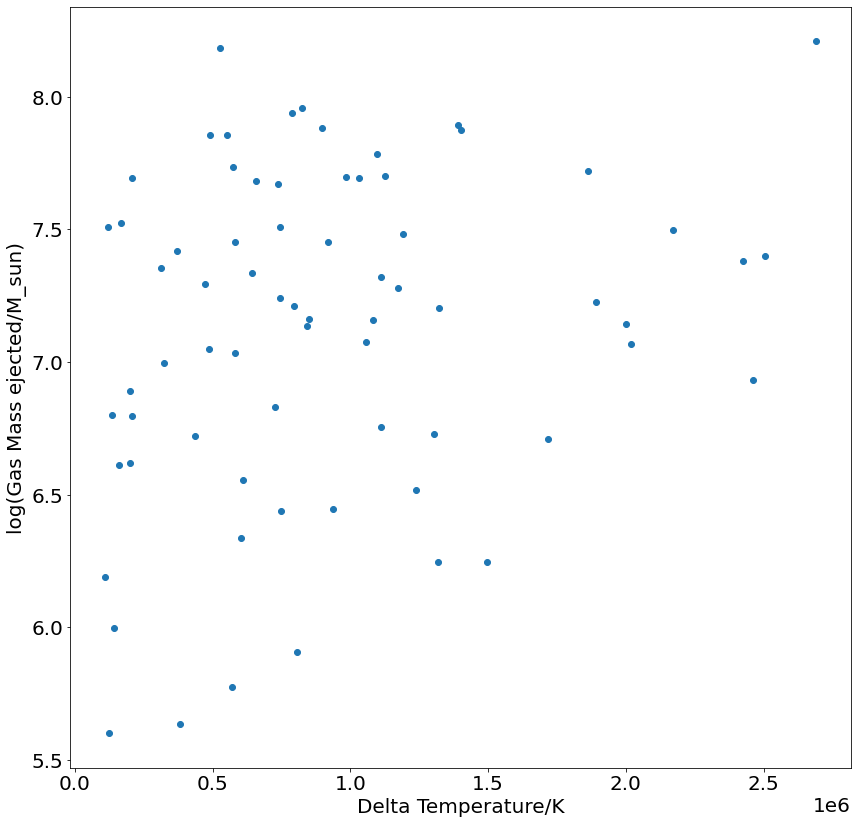

In [23]:
pl.figure(figsize=(14,14))

pl.scatter(DeltaTemp3, np.log10(Mass3), marker='o')

#pl.yscale('log')
# pl.xscale('log')

pl.xlabel('Delta Temperature/K')
pl.ylabel('log(Gas Mass ejected/M_sun)')

0.3634722484955717 0.4410948805168442


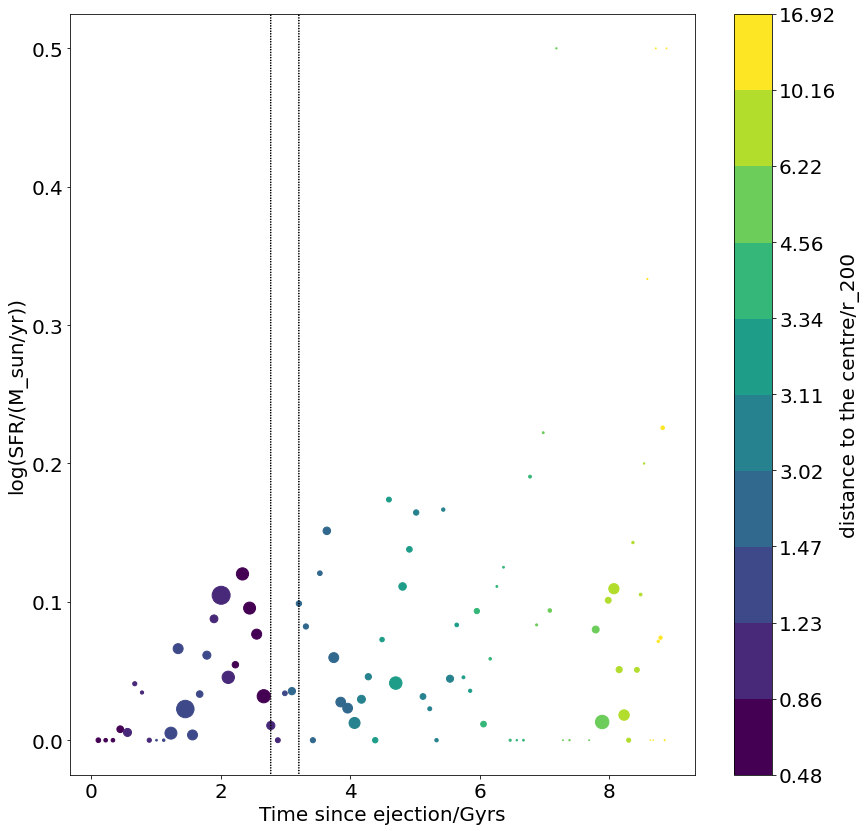

In [24]:
pl.figure(figsize=(14,14))

papels3 = np.percentile(dist3, vaper)
norm3 = mpc.BoundaryNorm(boundaries=papels3, ncolors=256)

pl.scatter(tzu3, Percent3, s=Mass3/5e5, c=dist3, norm=norm3)

tz1_3 = Cosmo.lookback_time(z1_3).value
tz2_3 = Cosmo.lookback_time(z2_3).value

pl.arrow(tz1_3, -100., 0., 200, color='black', ls=':')
pl.arrow(tz2_3, -100., 0., 200, color='black', ls=':')

bar = pl.colorbar(label='distance to the centre/r_200')
bar.set_ticks(papels3)

pl.ylabel('log(SFR/(M_sun/yr))')
pl.xlabel('Time since ejection/Gyrs')

print(z1_3, z2_3)

In [25]:
sim['SnapNumber_37/Header/Time'][()]

0.11607630318991208